## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('im.db')

#  fetch data
table_names_query = "SELECT name FROM sqlite_master WHERE type='table';"
table_names = pd.read_sql_query(table_names_query, conn)
print("Tables in the database:", table_names)


Tables in the database:             name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [3]:
db = """ 
SELECT * FROM movie_basics
 """
db = pd.read_sql_query(db, conn)
db.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
df = """ 
SELECT * FROM movie_ratings
"""
df = pd.read_sql_query(df, conn)
df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [5]:
df.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [6]:
db.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [7]:
df.shape, db.shape

((73856, 3), (146144, 6))

In [8]:
joined_query = """
SELECT mb.*, mr.*
FROM movie_basics mb
JOIN movie_ratings mr ON mb.movie_id = mr.movie_id
"""
joined_df = pd.read_sql_query(joined_query, conn)

joined_df.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119


In [9]:
joined_df.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
movie_id              0
averagerating         0
numvotes              0
dtype: int64

In [10]:
joined_df.shape

(73856, 9)

In [11]:
#let's remove the rows with missing values
cleaned_df = joined_df.dropna(subset=['runtime_minutes', 'genres'])
cleaned_df.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
movie_id           0
averagerating      0
numvotes           0
dtype: int64

In [12]:
#import csv file
data_csv = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
data_csv.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [13]:
data_csv.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [14]:
data_csv.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [15]:
#get rid of the rows with missing values
cleaned_csv = data_csv.dropna(subset=['studio', 'domestic_gross', 'foreign_gross'])
cleaned_csv.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [16]:
cleaned_csv.shape

(2007, 5)

## EDA

In [18]:
 cleaned_df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,65720.000000,65720.000000,65720.000000,6.572000e+04
mean,2014.258065,94.732273,6.320902,3.954674e+03
std,2.600143,209.377017,1.458878,3.208823e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.600000e+01
50%,2014.000000,91.000000,6.500000,6.200000e+01
75%,2016.000000,104.000000,7.300000,3.520000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [27]:
#change format for numbers in numvotes
def format_number(num):
    return '{:.0f}'.format(num)

cleaned_df['numvotes'] = cleaned_df['numvotes'].apply(format_number)
cleaned_df.describe()

C:\Users\Marijoise\AppData\Local\Temp\ipykernel_5132\3403316322.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['numvotes'] = cleaned_df['numvotes'].apply(format_number)


,start_year,runtime_minutes,averagerating
count,65720.000000,65720.000000,65720.000000
mean,2014.258065,94.732273,6.320902
std,2.600143,209.377017,1.458878
min,2010.000000,3.000000,1.000000
25%,2012.000000,81.000000,5.500000
50%,2014.000000,91.000000,6.500000
75%,2016.000000,104.000000,7.300000
max,2019.000000,51420.000000,10.000000


the Average movie runtime is 94.7 minutes. Let's try to compare the rating and the runtime of the movies.
the correlation between runtime and rating can be visualized using a scatter plot.

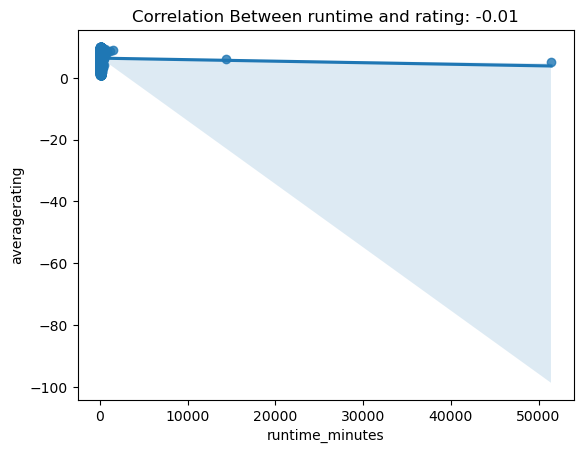

In [29]:
#checking the correlation between  runtime and rating
correlation = cleaned_df['runtime_minutes'].corr(cleaned_df['averagerating'])
sns.regplot(x='runtime_minutes', y='averagerating', data=cleaned_df)
plt.title('Correlation Between runtime and rating: {:.2f}'.format(correlation))
plt.show()

The correlation coefficient is -0.01, indicating a very weak negative correlation. This means that as the runtime increases, the average rating slightly decreases, but the relationship is almost negligible. In simpler terms, the length of runtime has almost no impact on the average rating. The data points are mostly clustered near the origin, with one outlier far along the horizontal axis, suggesting that most items have short runtimes and similar ratings, with very few exceptions.

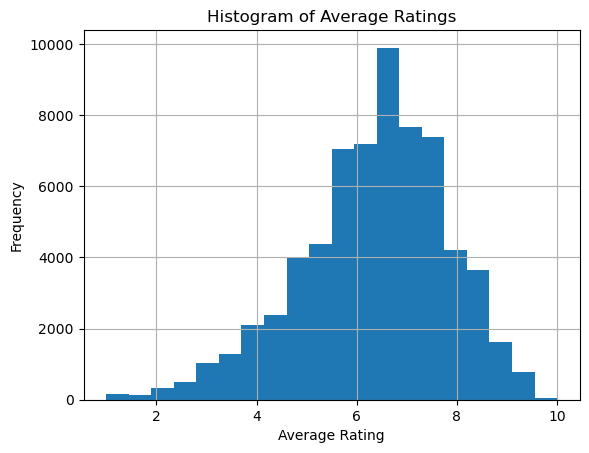

In [28]:
#let's plot a histogram for Ratings
cleaned_df['averagerating'].hist(bins=20)
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Average Ratings')
plt.show()

Most of the bars are concentrated around the center, indicating that most ratings fall within a middle range. This suggests that the data likely follows a normal distribution, meaning that the majority of ratings are average, with fewer ratings at the extreme low or high ends.

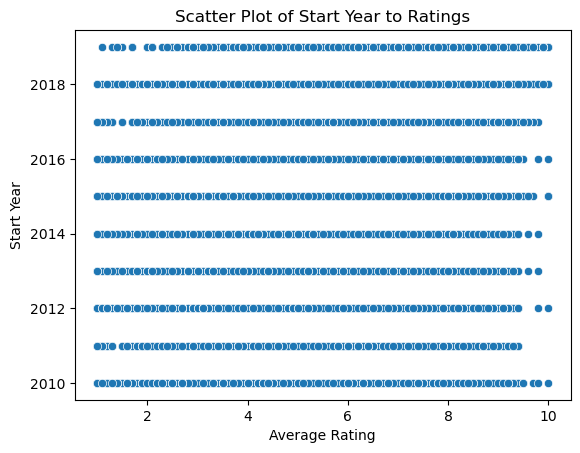

In [31]:
sns.scatterplot(x='averagerating', y='start_year', data=cleaned_df)
plt.title('Scatter Plot of Start Year to Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Start Year')
plt.show()

In [33]:
""" 
The start year doesn't affect the ratings of the movies.
"""

" \nThe start year doesn't affect the ratings of the movies.\n"

In [34]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65720 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   movie_id         65720 non-null  object 
 7   averagerating    65720 non-null  float64
 8   numvotes         65720 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.0+ MB


I just noticed that numvotes is a string, let's convert it to integer.

In [37]:
# Convert numvotes column to float data type
cleaned_df['numvotes'] = cleaned_df['numvotes'].astype(float)


C:\Users\Marijoise\AppData\Local\Temp\ipykernel_5132\1284639313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['numvotes'] = cleaned_df['numvotes'].astype(float)


In [36]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65720 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   movie_id         65720 non-null  object 
 7   averagerating    65720 non-null  float64
 8   numvotes         65720 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 5.0+ MB


C:\Users\Marijoise\AppData\Local\Temp\ipykernel_5132\2918696440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['numvotes_thousands'] = cleaned_df['numvotes'] / 1000


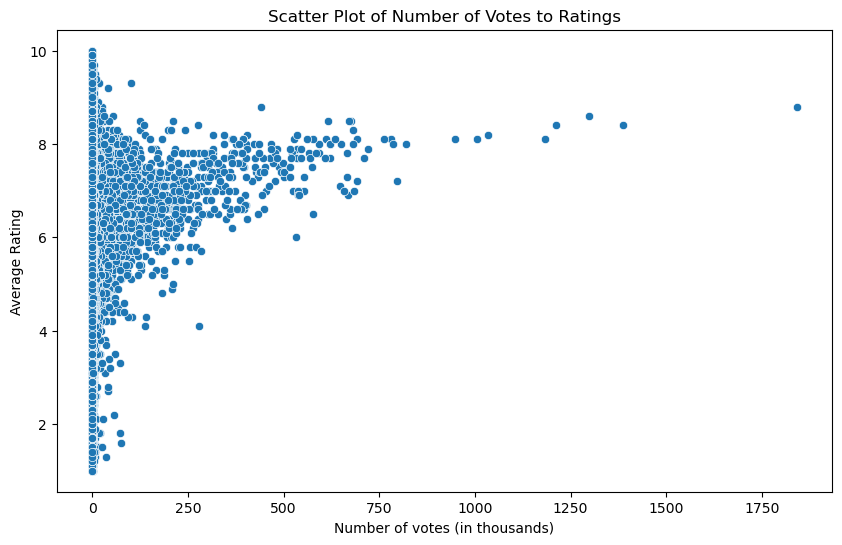

In [42]:
#first for clear reading
cleaned_df['numvotes_thousands'] = cleaned_df['numvotes'] / 1000
plt.figure(figsize=(10, 6))
# so does number of votes affect the ratings
sns.scatterplot(x='numvotes_thousands', y='averagerating', data=cleaned_df)
plt.title('Scatter Plot of Number of Votes to Ratings')
plt.xlabel('Number of votes (in thousands)')
plt.ylabel('Average Rating')
plt.show()

Dense Clustering Near Origin: Most items have a low number of votes and varying ratings. This suggests that many items are not widely rated, which is common in datasets where a few items are very popular, and many are less known.
Trend with Higher Votes: As the number of votes increases, the points spread out. There is a general trend where items with higher numbers of votes tend to have higher average ratings. This could indicate that more popular items are generally better received.
Variation Across Ratings: Even among items with high vote counts, there is a spread across the rating spectrum. This shows that while popularity (number of votes) can correlate with higher ratings, it is not a strict rule, and there are exceptions.
This analysis can help in understanding how the popularity of an item (measured by the number of votes) relates to its perceived quality (measured by average rating). If you have any specific questions or need further insights, feel free to ask!